In [1]:
import torch
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torchvision.models import ResNet50_Weights
import numpy as np
import torchvision.transforms as transforms        
from torch.utils.data import DataLoader
from torch.utils.data import Subset
from src.temperature_scaling import ModelWithTemperature
from src.imagenet_real import aps_imagenet_real_hist, raps_imagenet_real_hist, saps_imagenet_real_hist, aps_imagenet_real_scatter,raps_imagenet_real_scatter, saps_imagenet_real_scatter

#  Reprocess
data_transform = transforms.Compose([
    transforms.CenterCrop(256),
    transforms.Resize(256),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

sorted_val_path = "D:\\Download\\ImageNet-1K\\Validation_Set\\sorted_ImageNet_val"
dataset = ImageFolder(root=sorted_val_path, transform=data_transform)

# load pre-trained model 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1).to(device)

# Temperature Scaling
subset_size = len(dataset) // 10
indices = np.random.choice(len(dataset), subset_size, replace=False)
subset_dataset = Subset(dataset, indices)
train_loader = DataLoader(subset_dataset, batch_size=32, shuffle=False, num_workers=2)
model = ModelWithTemperature(model, temperature = 1.0).to(device)
model.set_temperature(train_loader)

model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.1

Before temperature - NLL: 1.128, ECE: 0.028
Optimal temperature: 0.984
After temperature - NLL: 1.127, ECE: 0.023


APS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9206 ± 0.0026
Final Average Prediction Set Size: 15.60 ± 0.49
Final Average Coverage: 0.8992 ± 0.0040
Final Average Real Probability: 0.7955 ± 0.0052


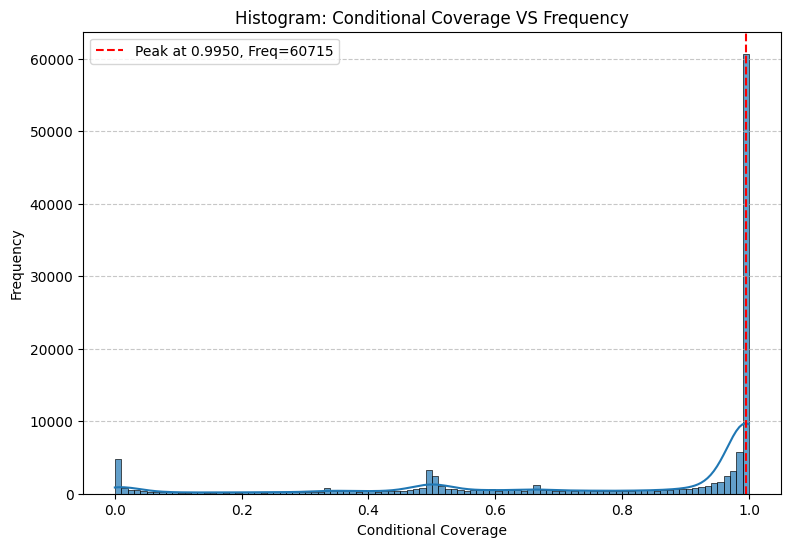

60715 (48.82%) samples reached the peak conditional coverage at 0.9950


In [2]:
aps_imagenet_real_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

RAPS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9848 ± 0.0022
Final Average Prediction Set Size: 3.21 ± 0.05
Final Average Coverage: 0.9002 ± 0.0031
Final Average Real Probability: 0.7505 ± 0.0051


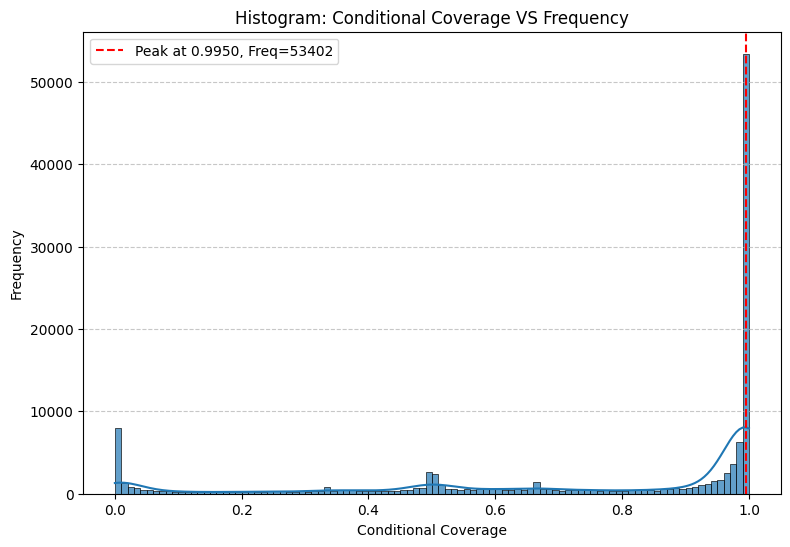

53402 (42.94%) samples reached the peak conditional coverage at 0.9950


In [3]:
raps_imagenet_real_hist(model, dataset, device, lambda_=0.1, k_reg=4, num_runs=10, alpha=0.1, is_ground_truth=False)

SAPS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.0677 ± 0.0096
Final Average Prediction Set Size: 3.08 ± 0.06
Final Average Coverage: 0.9002 ± 0.0029
Final Average Real Probability: 0.7431 ± 0.0054


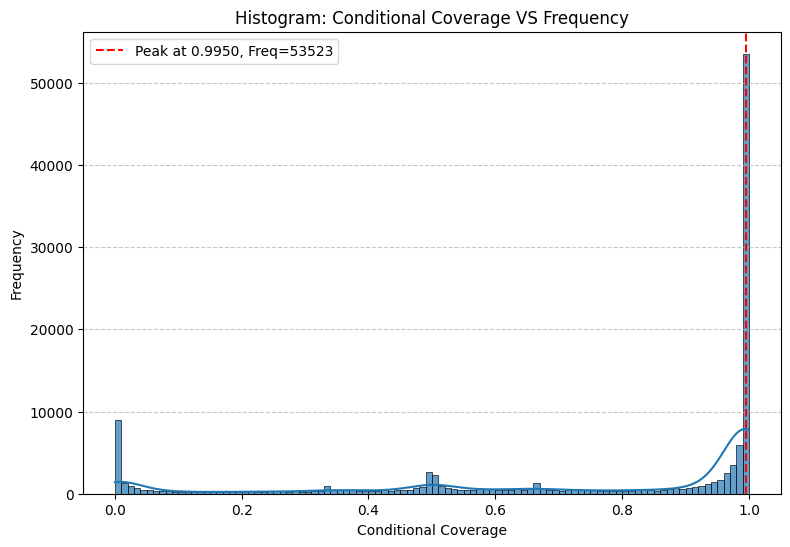

53523 (43.04%) samples reached the peak conditional coverage at 0.9950


In [4]:
saps_imagenet_real_hist(model, dataset, device, lambda_=0.15, num_runs=10, alpha=0.1, is_ground_truth=False)

APS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9235 ± 0.0025
Final Average Prediction Set Size: 14.67 ± 0.45
Final Average Coverage: 0.8993 ± 0.0040
Final Average Real Probability: 0.7934 ± 0.0056


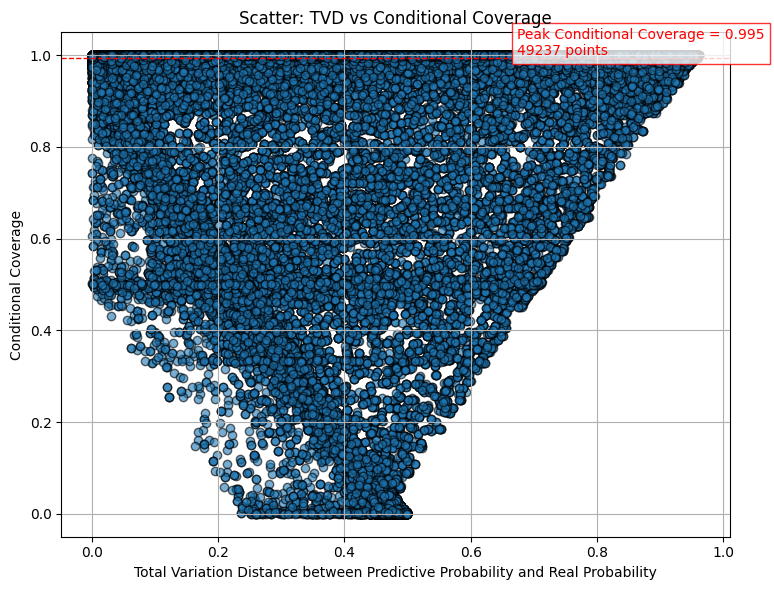

Peak Conditional Coverage = 0.995, with 49237 samples

=== Count Regions Summary ===
41989 (33.8%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
31796 (25.6%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
39897 (32.1%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.98003']
  Real Probability Set      : ['0.91320']
Sample 2:
  Predictive Probability Set: ['0.95204']
  Real Probability Set      : ['0.99946']
Sample 3:
  Predictive Probability Set: ['0.47610', '0.44897']
  Real Probability Set      : ['0.48918', '0.49152']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.94388']
  Real Probability Set      : ['0.00054']
Sample 2:
  Predictive Probability Set: ['0.91861']
  Real Probability Set      : ['0.00065']
Sample 3:
  Predictive Probability Set: ['0.56612', '0.30092', '0.11340']
  Real Probability Set      : ['0.00038

In [2]:
aps_imagenet_real_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9849 ± 0.0018
Final Average Prediction Set Size: 3.16 ± 0.04
Final Average Coverage: 0.9003 ± 0.0026
Final Average Real Probability: 0.7481 ± 0.0039


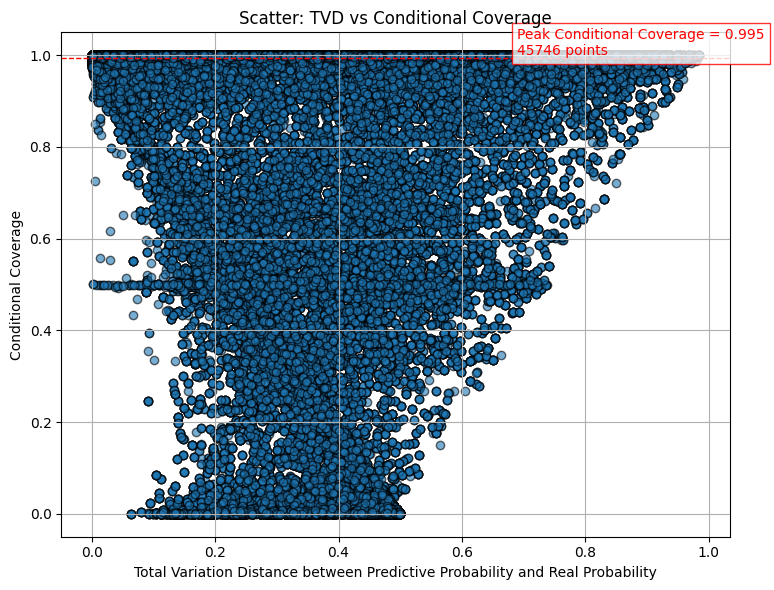

Peak Conditional Coverage = 0.995, with 45746 samples

=== Count Regions Summary ===
48558 (39.0%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
23213 (18.7%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
47305 (38.0%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.96270', '0.03549']
  Real Probability Set      : ['0.99977', '0.00011']
Sample 2:
  Predictive Probability Set: ['0.89918', '0.03405', '0.01412', '0.01407']
  Real Probability Set      : ['0.87559', '0.00030', '0.00030', '0.00817']
Sample 3:
  Predictive Probability Set: ['0.97486', '0.00524', '0.00298', '0.00180']
  Real Probability Set      : ['0.99861', '0.00035', '0.00035', '0.00035']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.61016', '0.05649', '0.04778', '0.04650', '0.04637']
  Real Probability Set      : ['0.00701', '0.00000', '0.00000', '0.05008'

In [3]:
raps_imagenet_real_scatter(model, dataset, device, lambda_=0.1, k_reg=4, num_runs=10, alpha=0.1)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.0693 ± 0.0090
Final Average Prediction Set Size: 3.06 ± 0.06
Final Average Coverage: 0.9003 ± 0.0029
Final Average Real Probability: 0.7419 ± 0.0050


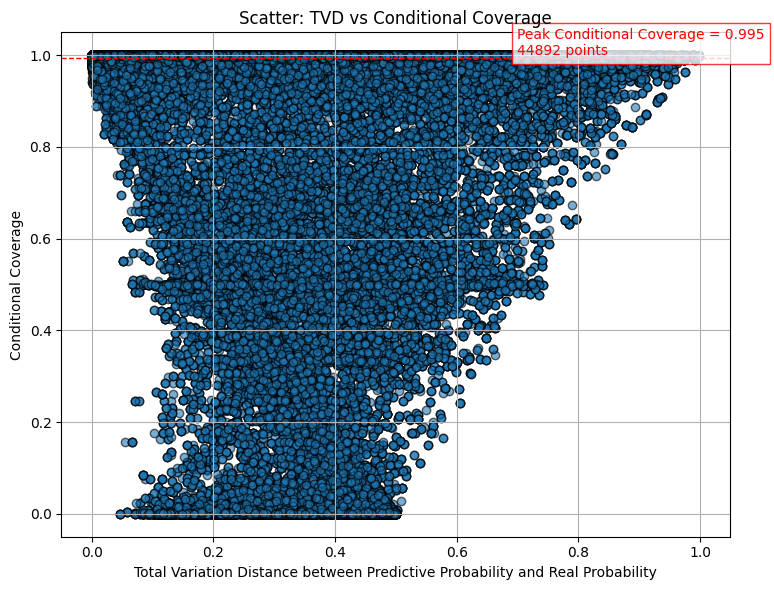

Peak Conditional Coverage = 0.995, with 44892 samples

=== Count Regions Summary ===
47979 (38.6%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
22291 (17.9%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
47544 (38.2%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.98305']
  Real Probability Set      : ['0.97063']
Sample 2:
  Predictive Probability Set: ['0.91938', '0.01497']
  Real Probability Set      : ['0.99798', '0.00202']
Sample 3:
  Predictive Probability Set: ['0.99506', '0.00054']
  Real Probability Set      : ['0.98699', '0.01088']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.20458', '0.14333', '0.11629', '0.06479', '0.05679', '0.03506', '0.03042']
  Real Probability Set      : ['0.00000', '0.00000', '0.00000', '0.00000', '0.00071', '0.00000', '0.00042']
Sample 2:
  Predictive Probability Set: ['0.38465', '

In [4]:
saps_imagenet_real_scatter(model, dataset, device, lambda_=0.15, num_runs=10, alpha=0.1)